In [63]:
#Q1
import numpy as np
import math 

def f(A,y0,eps):
    y=y0
    va_anc=1
    va_max=va_anc
    va=0
    n=0
    while(abs(va - va_anc)>eps):
        va_anc=va
        x=y/(np.linalg.norm(y))
        y=np.dot(A,x)
        va=np.dot(x.T,y)/np.dot(x.T,x)
        n+=1
        if(abs(va)>abs(va_max)):
            va_max=va
            vec_max=x
    return(va_max,vec_max,n)

A=np.matrix([[3,4,0],[1,3,0],[0,0,2]])
eps=1E-15 #la précision double (la précison simple =1e-7)
x0= np.matrix([2,1,1]).T
print(f(A,x0,eps))

(matrix([[5.]]), matrix([[8.94427191e-01],
        [4.47213595e-01],
        [1.22929137e-08]]), 21)


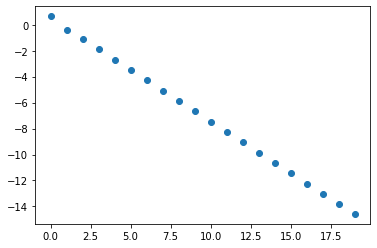

(matrix([[5.]]),
 matrix([[8.94427191e-01],
         [4.47213595e-01],
         [1.22929137e-08]]),
 21)

In [64]:
#Q2
import matplotlib.pyplot as plt 

def f2(A,y0,eps):
    y=y0
    va_anc=1
    va_max=va_anc
    va=0
    n=0
    GVA=[]
    while(abs(va - va_anc)>eps):
        GVA.append(math.log10(abs(va-va_anc)))
        va_anc=va
        x=y/(np.linalg.norm(y))
        y=np.dot(A,x)
        va=np.dot(x.T,y)/np.dot(x.T,x)
        n+=1
        if(abs(va)>abs(va_max)):
            va_max=va
            vec_max=x
    L=[i for i in range(n-1)]
    GVA.pop(0)
    plt.scatter(L,GVA)
    plt.show()
    return(va_max,vec_max,n)

f2(A,x0,eps)

In [65]:
#Q3
def deflation(A,x0,eps): 
    GVA=[]
    fifi=f(A,x0,eps)
    B=A
    while(round(fifi[0][0,0])!=0):
        GVA.append(fifi[0][0,0])
        B = B - fifi[0][0,0] *np.dot(fifi[1],fifi[1].T)/np.dot(fifi[1].T,fifi[1])
        fifi = f(B,x0,eps)
        
    return(GVA)

deflation(A,x0,eps)


KeyboardInterrupt: 

In [30]:
#Q1
G = np.zeros((500,500))
def open_webgraph():
    filin = open("webgraph.dat","r")
    for k in range(10460):
        ligne=filin.readline()
        i=int(ligne.split()[0])
        j=int(ligne.split()[1])
        G[i-1][j-1]=1
    filin.close()
    return()
open_webgraph()
print(G)



[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [40]:
#Q2
A = np.zeros((500,500))
def pp(d):
    for j in range(500):
        lj=0
        for k in range(500):
            lj+=G[k][j] 
        for i in range(500):
            if (lj!=0):
                A[i][j]=(d/500)+(1-d)*(G[i][j])/lj
            else:
                A[i][j]=1/500
    return()
pp(0.2)
print(A)

[[0.0004     0.00211306 0.00211674 ... 0.0004     0.0004     0.0004    ]
 [0.0004     0.0004     0.0004     ... 0.0004     0.0004     0.0004    ]
 [0.00206667 0.00211306 0.0004     ... 0.0004     0.0004     0.0004    ]
 ...
 [0.00206667 0.00211306 0.00211674 ... 0.0004     0.2004     0.0004    ]
 [0.00206667 0.00211306 0.00211674 ... 0.2004     0.0004     0.0004    ]
 [0.00206667 0.00211306 0.00211674 ... 0.0004     0.0004     0.0004    ]]


In [45]:
#Q3
def top_20():
    x0 = np.ones(500).T
    fifi=f(A,x0,eps)
    populaire = np.sort(fifi[1])
    populaire = populaire[480:]
    j = 0
    for i in range(20):
        while fifi[1][j] != populaire[19 - i]:
            j += 1
        print(j, " -> ",populaire[19-i])
        j = 0
    return
top_20()

5  ->  0.6996097877678462
54  ->  0.6210099860714523
157  ->  0.09267206401673161
158  ->  0.09143286877125704
159  ->  0.0914283533600413
159  ->  0.0914283533600413
175  ->  0.09101841845066443
176  ->  0.08936144505944937
177  ->  0.08930345803043671
43  ->  0.0873135802297204
152  ->  0.08651386929578979
75  ->  0.08629864858212417
223  ->  0.08568686545078098
279  ->  0.08468121042598292
79  ->  0.02206315124501644
195  ->  0.020272706056360158
191  ->  0.02027270605636012
190  ->  0.020272706056360116
190  ->  0.020272706056360116
190  ->  0.020272706056360116


In [49]:
#Q4
I = np.identity(500)
x0 = np.ones(500).T
B=A-I
lr,vr,br=np.linalg.svd(B)
#print(br[-1])

import time as time

start=time.time()

for i in range(1000):
    f(A,x0,eps)

print("temps exe puissance iter : ",time.time()-start)

start=time.time()

for i in range(1000):
    lr,vr,br=np.linalg.svd(B)

print("temps exe Numpy solve : ",time.time()-start)



temps ex puissance iter :  -15.662702322006226
temps ex Numpy solve :  -257.5263500213623
